----
###### 목차
0. 데이터 불러오기
1. train.csv 파일만 분석하기로 결정
2. 데이터 전처리하기
3. Pandas Visualizer로 raw data 살펴보기

----
<br><br><br>


# 0. 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# 1. train.csv 파일만 분석하기로 결정


## 1.1 데이터 훑어보기

In [5]:
train.head()

,num,date_time,전력사용량(kWh),기온,풍속(m/s),습도(%),강수량(mm|6시간),일조(hr|),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [6]:
test.head()

,num,date_time,기온,풍속(m/s),습도(%),강수량(mm|6시간),일조(hr|3시간),비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 데이터 결측치 확인하기

In [7]:
train.isnull().sum().sort_values(ascending=False)

num            0
date_time      0
전력사용량(kWh)     0
기온             0
풍속(m/s)        0
습도(%)          0
강수량(mm|6시간)    0
일조(hr|)        0
비전기냉방설비운영      0
태양광보유          0
dtype: int64

In [8]:
test.isnull().sum().sort_values(ascending=False)

태양광보유          8456
강수량(mm|6시간)    8400
비전기냉방설비운영      7784
기온             6720
풍속(m/s)        6720
습도(%)          6720
일조(hr|3시간)     6720
num               0
date_time         0
dtype: int64

**결측치가 없는 train 데이터로 EDA를 진행하는 것으로 결정함**

# 2. 데이터 전처리하기

## 2.1 영문 컬럼명으로 변경하기

In [9]:
train.columns = ['num', 'date_time', 'target', 'temp', 'wind', 'humid', 'rain', 'sunny', 'cooler', 'solar']
train.head()

,num,date_time,target,temp,wind,humid,rain,sunny,cooler,solar
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


## 2.2 날짜와 관련된 컬럼 추가하기

In [10]:
train['date_time'] = pd.to_datetime(train['date_time'])
train['date'] = train['date_time'].dt.date
train['day'] = train['date_time'].dt.day
train['month'] = train['date_time'].dt.month
train['hour'] = train['date_time'].dt.hour
train['weekday'] = train['date_time'].dt.weekday # 0: 월요일
train['dayofyear'] = train.date_time.dt.dayofyear            # 연 기준 몇일째(숫자)
train.head()

,num,date_time,target,temp,wind,humid,rain,sunny,cooler,solar,date,day,month,hour,weekday,dayofyear
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,2020-06-01,1,6,0,0,153
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,2020-06-01,1,6,1,0,153
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2020-06-01,1,6,2,0,153
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,2020-06-01,1,6,3,0,153
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,2020-06-01,1,6,4,0,153


# 3. Pandas Visualizer로 raw data 살펴보기

train 데이터 전체를 살펴보기도 하고, 건물번호 별로 살펴보기도 했습니다.
아래는 건물번호 1번 그래프를 살펴본 코드입니다.

In [16]:
# from pandas_visual_analysis import VisualAnalysis
# VisualAnalysis(train[train['num']==1])

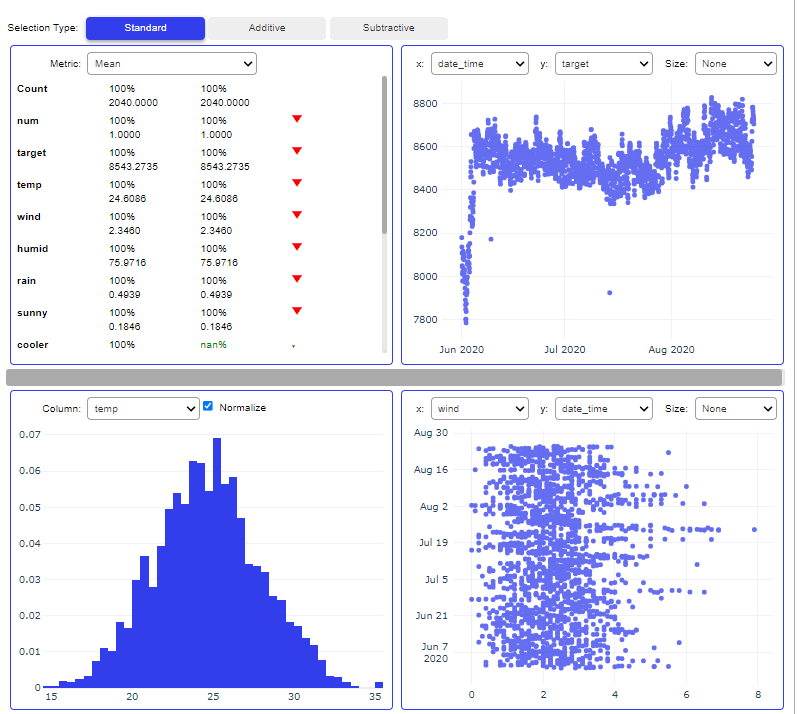

노트북을 저장하면 나타나지 않는 프로그램이라, 캡쳐화면으로 대체합니다.

컬럼당 평균값, 최소 , 중간, 최대, 1분위수, 3분위수에 대한 정보를 확인할 수 있으며, 컬럼 2개를 선택하여 scatter plot과 히스토그램 그래프를 그려볼 수 있는 기능이 있는 패키지입니다.